In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("C:/Users/Akif/Desktop/football/rankingv5v2.csv")

In [21]:
X = data[['home_club_id', 'away_club_id', 'attendance', 'home_team_points', 'away_team_points',
          'home_attack_value', 'away_attack_value', 'home_midfield_value', 'away_midfield_value',
          'home_defender_value', 'away_defender_value', 'home_goalkeeper_value', 'away_goalkeeper_value',
          'home_total_market_value', 'away_total_market_value', 'home_power_score', 'away_power_score']]

In [22]:
data['strength_diff'] = (
    data['home_team_points'] + data['home_attack_value'] + data['home_midfield_value'] +
    data['home_defender_value'] + data['home_goalkeeper_value'] + data['home_power_score']
) - (
    data['away_team_points'] + data['away_attack_value'] + data['away_midfield_value'] +
    data['away_defender_value'] + data['away_goalkeeper_value'] + data['away_power_score']
)

y = data['strength_diff']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [25]:
best_ridge = grid_search.best_estimator_

cv_score = cross_val_score(best_ridge, X_train, y_train, cv=5)
print(f"Cross-validated R^2 score: {np.mean(cv_score)}")

Cross-validated R^2 score: 0.999999999999653


In [26]:
best_ridge.fit(X_train, y_train)

y_pred = best_ridge.predict(X_test)

predicted_winner = np.where(y_pred > 0.5, 'Home', np.where(y_pred < -0.5, 'Away', 'Draw'))

actual_winner = data.loc[X_test.index, 'predicted_winner']

accuracy = accuracy_score(actual_winner, predicted_winner)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8603836222796016


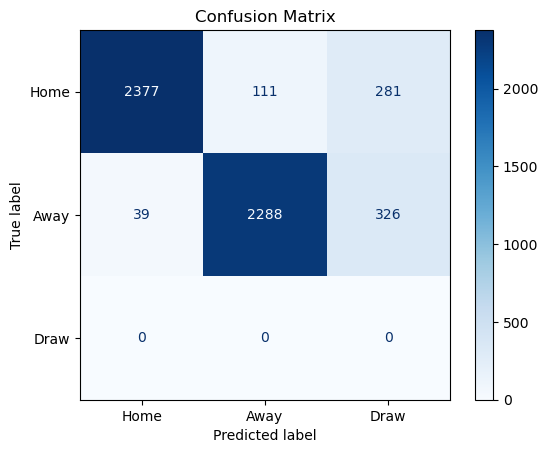

In [27]:
cm = confusion_matrix(actual_winner, predicted_winner, labels=["Home", "Away", "Draw"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Home", "Away", "Draw"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

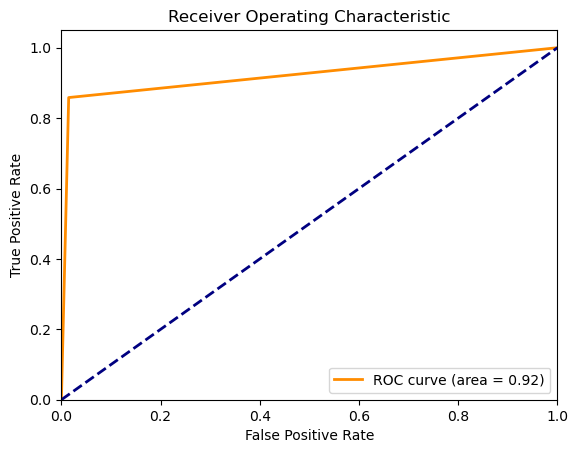

In [28]:
binary_actual = np.where(actual_winner == 'Home', 1, 0)
binary_pred = np.where(predicted_winner == 'Home', 1, 0)

fpr, tpr, _ = roc_curve(binary_actual, binary_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

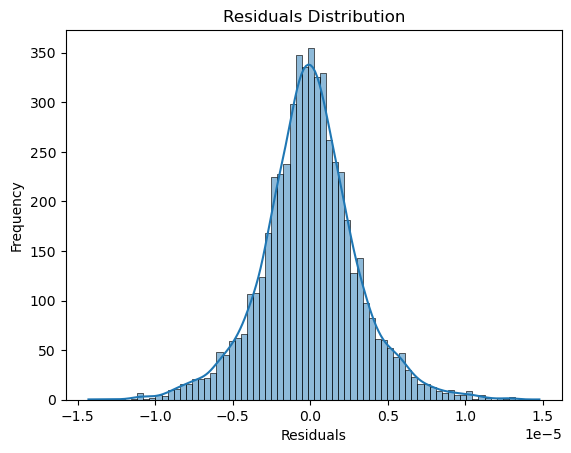

In [29]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()